In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
#from scipy.integrate import simps
from scipy import stats
from matplotlib.ticker import FuncFormatter
from matplotlib.legend_handler import HandlerLine2D
import math
import matplotlib.pyplot as plt
import seaborn as sns
import math
import os
from scipy.stats import mannwhitneyu

In [ ]:
def plot_data_three(df1, df2, df3, output_path):
    features = ['Peak-to-Trough', 'Half-width', 'Repolarization slope', 'Recovery slope', 'Conduction Speed','FR', 'ISIm', 'ISIstd', 'ISIcv', 'Mean_Amplitude']
    labels = ['Peak-to-Trough Ratio', 'Half-Width [s]', 'Repolarization Slope', 'Recovery Slope', 'Conduction Speed [m/s]', 'Firing rate [Hz]', 'Interspike Interval mean [s]', 'Interspike Interval SD', 'Interspike Interval CV', 'Mean Amplitude [uV]']
    titles = ['Peak-to-Trough Ratio', 'Half-Width', 'Repolarization Slope', 'Recovery Slope', 'Conduction Speed', 'Firing Rate', 'Interspike Interval', 'Interspike Interval SD', 'Interspike Interval CV', 'Mean Amplitude']

    n_features = len(features)
    ncols = 4  # You can adjust this depending on how many features you have
    nrows = math.ceil(n_features / ncols)  # Ensures enough rows


    fig, axes = plt.subplots(nrows, ncols, figsize=(14, 4.2 * nrows))

    axes = axes.flatten()

    # Step 3: Loop through features and plot on each subplot
    for i, feature in enumerate(features):
        
        sns.histplot(df1[feature], stat = "percent", bins=50, kde = True, ax=axes[i], color='#e59494', label='NGN2', alpha=0.5, edgecolor='#e59494')
        sns.histplot(df2[feature], stat = "percent", bins=50, kde = True, ax=axes[i], color='#6fa8dc', label='GABA', alpha=0.5, edgecolor='#6fa8dc')
        sns.histplot(df3[feature], stat = "percent", bins=50, kde = True, ax=axes[i], color='#88dbba', label='CoCult', alpha=0.5, edgecolor='#88dbba')

        axes[i].set_title(f'{titles[i]}', fontsize = 16)
        axes[i].set_xlabel(labels[i], fontsize = 14)
        axes[i].set_ylabel('% of Units', fontsize= 14)
        axes[i].tick_params(axis='x', labelsize=12)  # Adjust x-axis tick label size
        axes[i].tick_params(axis='y', labelsize=12)  # Adjust y-axis tick label size
        #axes[i].legend()

    # Step 4: Remove unused axes if there are any
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

        # Add a title for the entire figure
    # plt.suptitle(f'Distributions of all features on DIV {DIV} ', fontsize=20)

    fig.legend(labels=['NGN2', 'GABA', 'CoCulture'], loc='center', fontsize=16, bbox_to_anchor=(0.61, 0.27))

    # Step 5: Adjust layout for better readability
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.4, wspace=0.4)  # Increase spacing between rows and columns


    # Iterate over all subplots to align titles and handle the "1e6" issue
    for ax in fig.axes:
        ax.set_title(ax.get_title(), pad=10, fontsize = 18)  # Adjust the pad value as needed

        # Optionally hide the offset text (e.g., "1e6") if it interferes with the title
        if ax.xaxis.offsetText.get_text():
            ax.xaxis.offsetText.set_visible(False)
            ax.set_xlabel(f"{ax.get_xlabel()} (1e6)")  # Append manually to the label
    
    plt.savefig(output_path, dpi=300, bbox_inches='tight', format='png')

    # Step 6: Show the combined plot
    plt.show()



In [2]:
a =pd.read_pickle('/itet-stor/kvulic/neuronies/single_neurons/3_Student_Projects/Amelie/Processed_data/Results/extremum_results_final.pkl')

In [3]:
MAIN_PATH = '/itet-stor/kvulic/neuronies/single_neurons/3_Student_Projects/Amelie/Processed_data/'
OUTPUT_PATH = os.path.join(MAIN_PATH, 'Results')

In [4]:
df_original = a
df_original


,filename,chip_id,area,div,electrode,unit_idx,unit_id,data_type,firing_rate,isi_mean,...,peak_to_trough_duration,peak_trough_ratio,repolarization_slope,recovery_slope,half_width,peak_idx,trough_idx,amplitude uV,template,speed_ms-1
0,ID1765_N8_DIV140_DATE20250207_1023_spontaneous...,1765,8,140,19947,13,14,SPIKEMAT_EXTREMUM,12.709669,78.738707,...,0.65,0.154787,-1.793017e+06,-120049.949646,0.25,53,40,1212.455200,"[-2.772856, -2.7412357, -3.0772898, -3.0556083...",NaN
1,ID1765_N8_DIV140_DATE20250207_1023_spontaneous...,1765,8,140,21024,20,24,SPIKEMAT_EXTREMUM,7.048586,142.062601,...,1.00,0.167886,-1.456302e+06,-89764.335632,0.25,61,41,886.629028,"[-10.695522, -10.419479, -10.015421, -9.742775...",NaN
2,ID1765_N8_DIV140_DATE20250207_1023_spontaneous...,1765,8,140,22124,11,12,SPIKEMAT_EXTREMUM,2.352022,426.880444,...,0.30,0.285031,-5.419659e+05,-113681.030273,0.20,46,40,400.267365,"[-2.7542396, -3.1696162, -3.480334, -3.6394703...",NaN
3,ID1765_N8_DIV140_DATE20250207_1023_spontaneous...,1765,8,140,19518,3,3,SPIKEMAT_EXTREMUM,1.631672,616.494675,...,0.60,0.442921,-8.626428e+05,-458804.046631,0.15,52,40,624.009033,"[2.4428904, 2.9308987, 3.299109, 3.8961368, 5....",NaN
4,ID1765_N8_DIV140_DATE20250207_1023_spontaneous...,1765,8,140,21024,19,23,SPIKEMAT_EXTREMUM,3.079356,325.742462,...,0.60,0.220502,-2.815087e+05,-30752.592087,0.30,52,40,157.077209,"[-0.27469844, 0.012822852, 0.6820404, 1.273498...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21752,ID1765_N0_DIV49_DATE20241108_1016_spontaneous_...,1765,0,49,15437,3,11,SPIKEMAT_EXTREMUM,0.781105,1304.392453,...,0.45,0.379122,-5.742650e+05,-170629.669189,0.25,49,40,300.761230,"[-0.022627389, 0.5893635, 1.3431509, 1.5283918...",0.413231
21753,ID1765_N0_DIV49_DATE20241108_1016_spontaneous_...,1765,0,49,8610,2,9,SPIKEMAT_EXTREMUM,3.805586,263.763208,...,1.25,0.127528,-4.270967e+05,-10715.694427,0.35,65,40,215.998138,"[-6.268952, -6.728142, -6.5936084, -6.0189147,...",0.350348
21754,ID1765_N0_DIV49_DATE20241108_1016_spontaneous_...,1765,0,49,14993,6,16,SPIKEMAT_EXTREMUM,1.376135,734.322105,...,0.85,0.228397,-1.347990e+05,-7238.524437,0.35,57,40,67.399475,"[-1.4445795, -0.31602663, 1.3166906, 1.586288,...",0.267157
21755,ID1765_N0_DIV49_DATE20241108_1016_spontaneous_...,1765,0,49,14553,5,15,SPIKEMAT_EXTREMUM,0.984322,1031.090299,...,1.20,0.047772,-4.714147e+05,-9284.446716,0.15,64,40,282.733643,"[0.93760747, 1.8134977, 2.2106574, 2.2346528, ...",0.444945


In [5]:
div_filt = 35
df = df_original[df_original['div'].astype(int) == div_filt]
type(df['chip_id'])

pandas.core.series.Series

In [6]:
chip_ids_to_plot = ['1908','1821','1765','2034','2074', '1811', '1135']
df = df[df['chip_id'].isin(chip_ids_to_plot)]


In [7]:
df

,filename,chip_id,area,div,electrode,unit_idx,unit_id,data_type,firing_rate,isi_mean,...,peak_to_trough_duration,peak_trough_ratio,repolarization_slope,recovery_slope,half_width,peak_idx,trough_idx,amplitude uV,template,speed_ms-1
22,ID2034_N3_DIV35_DATE20241127_1544_spontaneous_...,2034,3,35,7074,27,29,SPIKEMAT_EXTREMUM,3.528320,284.459158,...,1.50,0.086088,-2.728879e+05,0.000000,0.40,79,49,143.816742,"[-6.314716, -6.63426, -7.2937217, -8.56234, -1...",1.419311
23,ID2034_N3_DIV35_DATE20241127_1544_spontaneous_...,2034,3,35,9256,18,19,SPIKEMAT_EXTREMUM,2.033483,494.899363,...,0.70,0.284248,-2.680837e+05,-42660.037994,0.30,54,40,148.376755,"[6.687971, 6.791456, 6.7550836, 6.835834, 6.95...",0.528231
24,ID2034_N3_DIV35_DATE20241127_1544_spontaneous_...,2034,3,35,6420,30,32,SPIKEMAT_EXTREMUM,1.507604,669.022414,...,1.15,0.134037,-1.854505e+05,-13119.379997,0.15,63,40,99.213623,"[-0.026687747, -0.15761572, -0.006503847, 1.00...",0.942404
25,ID2034_N3_DIV35_DATE20241127_1544_spontaneous_...,2034,3,35,13216,23,24,SPIKEMAT_EXTREMUM,4.588149,218.568503,...,1.10,0.261754,-4.262946e+05,-36261.528015,0.30,62,40,237.855667,"[5.728044, 6.5891643, 7.773545, 9.744434, 11.7...",1.406983
26,ID2034_N3_DIV35_DATE20241127_1544_spontaneous_...,2034,3,35,9026,9,9,SPIKEMAT_EXTREMUM,1.656200,608.546063,...,1.35,0.157318,-2.000836e+05,-26335.556030,0.35,67,40,102.549576,"[-1.3907224, -1.3382281, -1.6187385, -2.394037...",0.351213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21744,ID1765_N2_DIV35_DATE20241025_1638_spontaneous_...,1765,2,35,2955,21,28,SPIKEMAT_EXTREMUM,0.464655,2199.960000,...,0.50,0.305968,-1.560981e+06,-258646.484375,0.25,50,40,834.321899,"[4.121779, 6.5827837, 10.525133, 14.027275, 17...",0.646434
21745,ID1765_N2_DIV35_DATE20241025_1638_spontaneous_...,1765,2,35,15958,14,19,SPIKEMAT_EXTREMUM,0.712768,1423.612500,...,1.60,0.170252,-2.358610e+05,-3731.994629,0.35,71,39,126.975769,"[-8.421886, -7.7123384, -5.537729, -3.956722, ...",0.256667
21746,ID1765_N2_DIV35_DATE20241025_1638_spontaneous_...,1765,2,35,14171,42,55,SPIKEMAT_EXTREMUM,0.360224,2860.172727,...,1.85,0.212495,-1.537569e+05,0.000000,0.30,77,40,81.784988,"[3.2683003, 2.8993926, 3.5626245, 4.2421894, 4...",2.977044
21747,ID1765_N2_DIV35_DATE20241025_1638_spontaneous_...,1765,2,35,4941,7,11,SPIKEMAT_EXTREMUM,2.091375,480.738919,...,2.00,0.375477,-5.302579e+05,-32821.640015,0.75,67,27,282.967834,"[15.180037, 18.376513, 22.09674, 26.06504, 30....",0.286364


In [8]:
#remove conduction speeds largeer than 5 and firing rates larger than 10
df = df[df['speed_ms-1'] < 5]
df = df[df['firing_rate'] < 10]

Cell type: NGN2, Count: 1489
Cell type: GABA, Count: 316
Cell type: CoCulture, Count: 12
Cell type: NGN2, Count: 1489
Cell type: GABA, Count: 316
Cell type: CoCulture, Count: 12
Cell type: NGN2, Count: 1489
Cell type: GABA, Count: 316
Cell type: CoCulture, Count: 12
Cell type: NGN2, Count: 1489
Cell type: GABA, Count: 316
Cell type: CoCulture, Count: 12
Cell type: NGN2, Count: 1489
Cell type: GABA, Count: 316
Cell type: CoCulture, Count: 12
Cell type: NGN2, Count: 1489
Cell type: GABA, Count: 316
Cell type: CoCulture, Count: 12
Cell type: NGN2, Count: 1489
Cell type: GABA, Count: 316
Cell type: CoCulture, Count: 12
Cell type: NGN2, Count: 1489
Cell type: GABA, Count: 316
Cell type: CoCulture, Count: 12
Cell type: NGN2, Count: 1489
Cell type: GABA, Count: 316
Cell type: CoCulture, Count: 12
Cell type: NGN2, Count: 1489
Cell type: GABA, Count: 316
Cell type: CoCulture, Count: 12


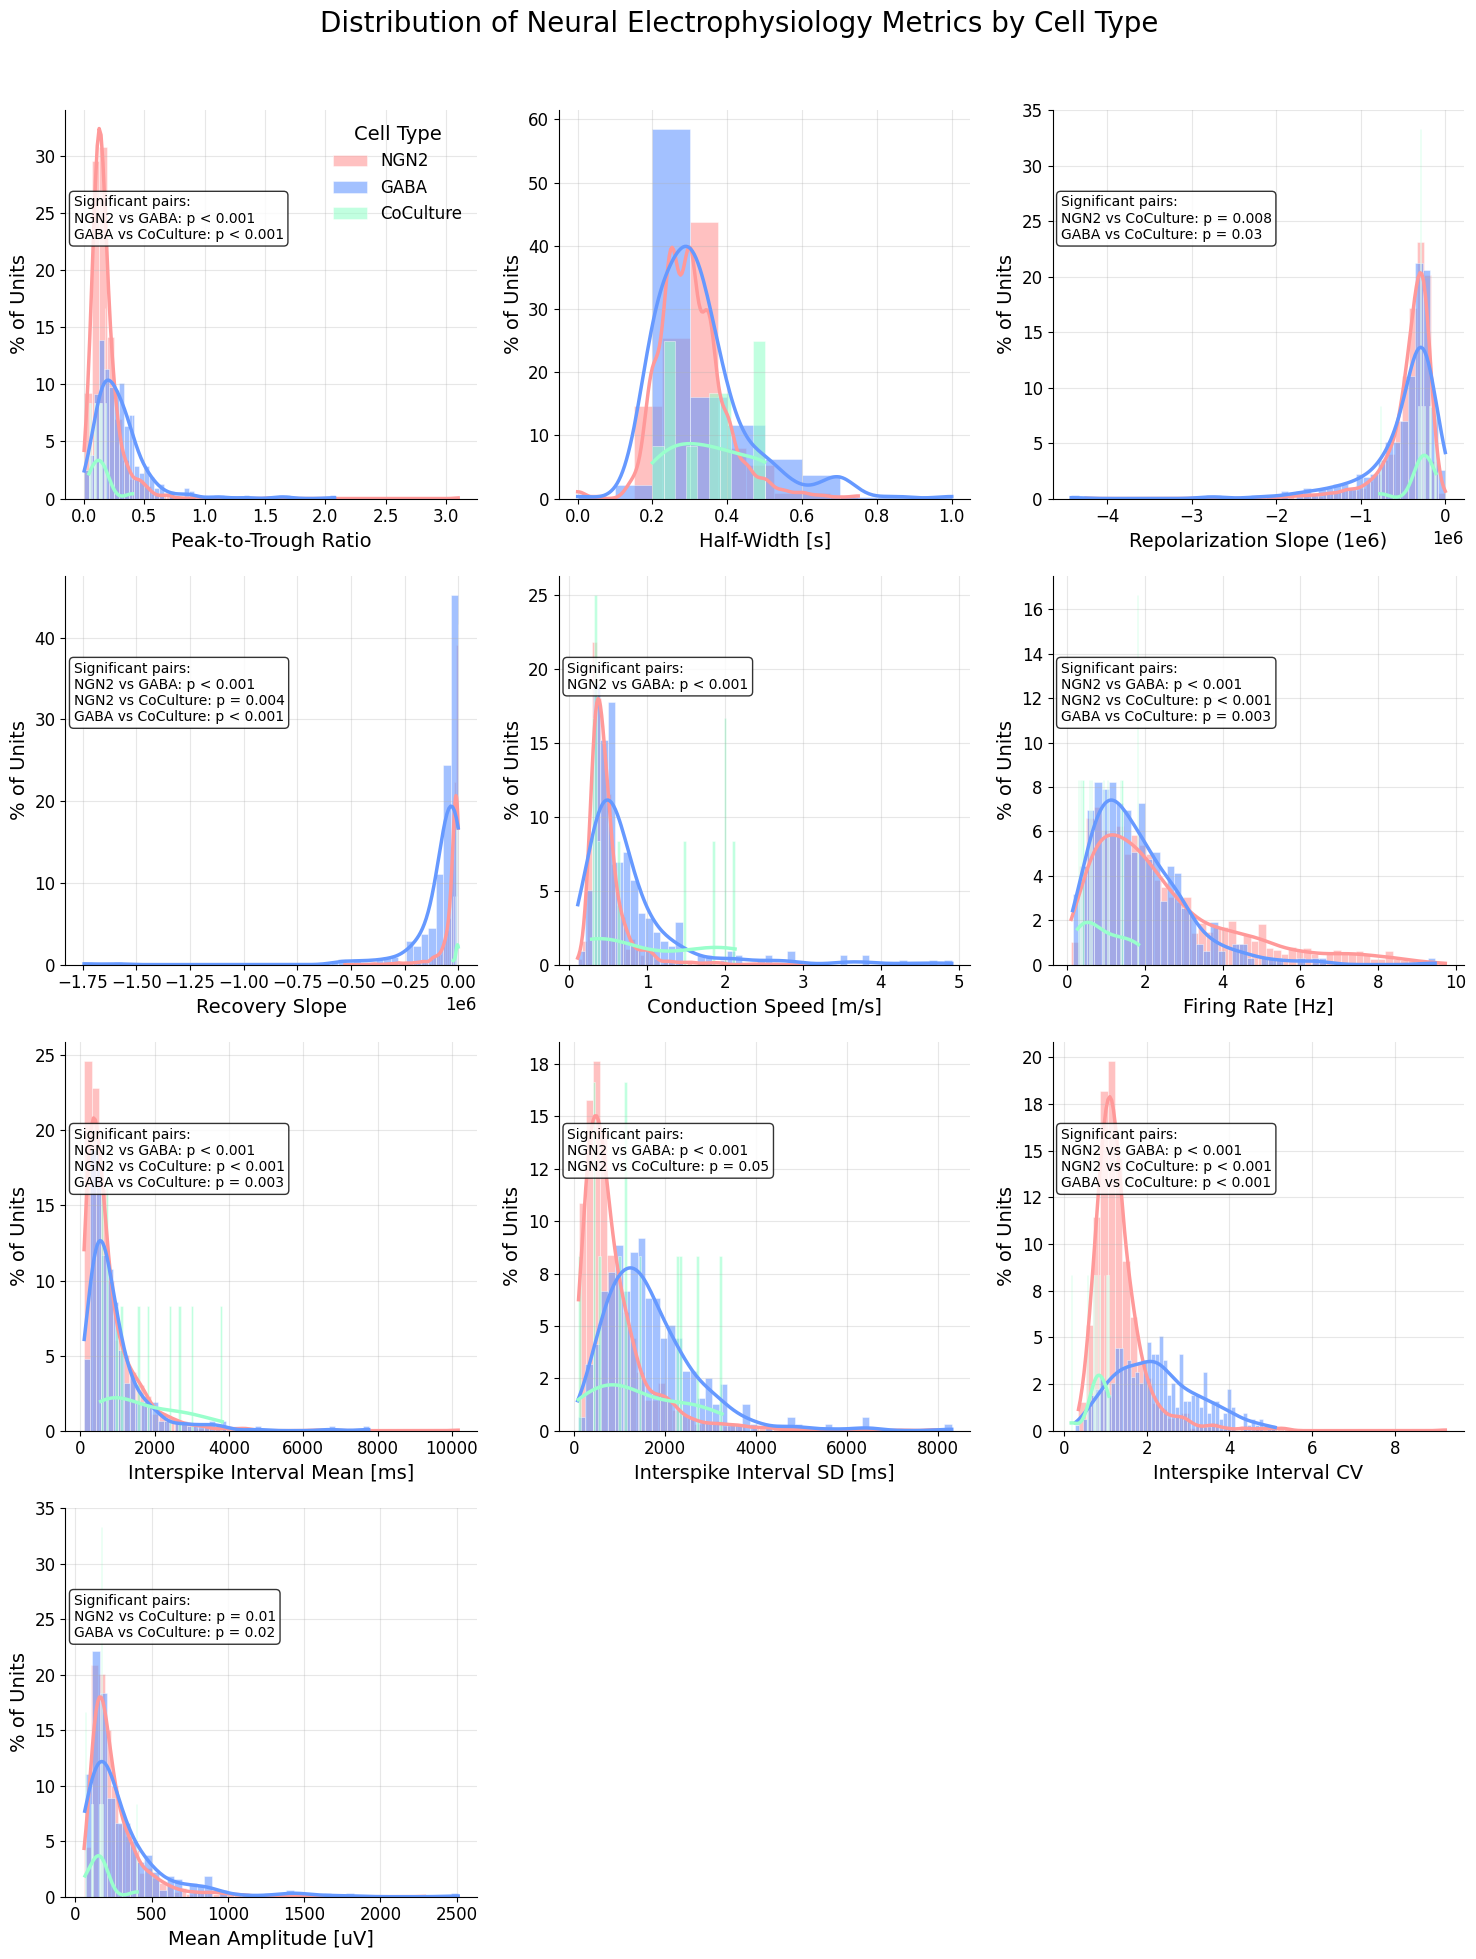


STATISTICAL ANALYSIS RESULTS

📊 PEAK-TO-TROUGH RATIO
--------------------
Kruskal-Wallis Test: p < 0.001
✅ SIGNIFICANT - Distributions differ between cell types

Pairwise Comparisons (Mann-Whitney U):
  NGN2 vs GABA: p < 0.001 - ✅ SIGNIFICANT
  NGN2 vs CoCulture: p = 0.28 - ❌ Not significant
  GABA vs CoCulture: p < 0.001 - ✅ SIGNIFICANT

📊 HALF-WIDTH [S]
--------------
Kruskal-Wallis Test: p = 0.09
❌ NOT SIGNIFICANT - No difference between cell types

📊 REPOLARIZATION SLOPE (1E6)
--------------------------
Kruskal-Wallis Test: p = 0.04
✅ SIGNIFICANT - Distributions differ between cell types

Pairwise Comparisons (Mann-Whitney U):
  NGN2 vs GABA: p = 0.94 - ❌ Not significant
  NGN2 vs CoCulture: p = 0.008 - ✅ SIGNIFICANT
  GABA vs CoCulture: p = 0.03 - ✅ SIGNIFICANT

📊 RECOVERY SLOPE
--------------
Kruskal-Wallis Test: p < 0.001
✅ SIGNIFICANT - Distributions differ between cell types

Pairwise Comparisons (Mann-Whitney U):
  NGN2 vs GABA: p < 0.001 - ✅ SIGNIFICANT
  NGN2 vs CoCulture:

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import kruskal
import itertools

# Set the style for better-looking plots
plt.style.use('default')
sns.set_palette("husl")

# Set global font sizes
plt.rcParams.update({
    'font.size': 14,           # Base font size
    'axes.titlesize': 16,      # Title font size
    'axes.labelsize': 14,      # Axis labels
    'xtick.labelsize': 12,     # X-axis tick labels
    'ytick.labelsize': 12,     # Y-axis tick labels
    'legend.fontsize': 12,     # Legend font size
    'figure.titlesize': 18     # Figure title
})

# Define the metrics and their display names with optimal bin counts and scaling
metrics_info = {
    'peak_trough_ratio': {'title': 'Peak-to-Trough Ratio', 'bins': 50, 'scale': 1},
    'half_width': {'title': 'Half-Width [s]', 'bins': 10, 'scale': 1},
    'repolarization_slope': {'title': 'Repolarization Slope (1e6)', 'bins': 50, 'scale': 1},
    'recovery_slope': {'title': 'Recovery Slope', 'bins': 50, 'scale': 1},
    'speed_ms-1': {'title': 'Conduction Speed [m/s]', 'bins': 50, 'scale': 1},
    'firing_rate': {'title': 'Firing Rate [Hz]', 'bins': 50, 'scale': 1},
    'isi_mean': {'title': 'Interspike Interval Mean [ms]', 'bins': 50, 'scale': 1},
    'isi_std': {'title': 'Interspike Interval SD [ms]', 'bins': 50, 'scale': 1},
    'isi_cv': {'title': 'Interspike Interval CV', 'bins': 50, 'scale': 1},
    'amplitude uV': {'title': 'Mean Amplitude [uV]', 'bins': 50, 'scale': 1}
}

def perform_statistical_tests(df, metric, cell_types):
    """Perform Kruskal-Wallis test and pairwise comparisons"""
    groups = []
    group_names = []
    
    for cell_type in cell_types:
        if cell_type in df['cell_type'].values:
            data = df[df['cell_type'] == cell_type][metric].dropna()
            if len(data) > 0:
                groups.append(data)
                group_names.append(cell_type)
    
    if len(groups) < 2:
        return None, []
    
    # Kruskal-Wallis test (non-parametric ANOVA)
    kw_stat, kw_p = kruskal(*groups)
    
    # Pairwise Mann-Whitney U tests if overall test is significant
    pairwise_results = []
    if kw_p < 0.05:
        for i, j in itertools.combinations(range(len(groups)), 2):
            stat, p_val = stats.mannwhitneyu(groups[i], groups[j], alternative='two-sided')
            pairwise_results.append({
                'group1': group_names[i],
                'group2': group_names[j],
                'p_value': p_val,
                'significant': p_val < 0.05
            })
    
    return kw_p, pairwise_results

def format_p_value(p):
    """Format p-value for display"""
    if p < 0.001:
        return "p < 0.001"
    elif p < 0.01:
        return f"p = {p:.3f}"
    else:
        return f"p = {p:.2f}"

# Create figure with subplots (2 rows, 5 columns)
fig, axes = plt.subplots(4, 3, figsize=(15, 20))
fig.suptitle('Distribution of Neural Electrophysiology Metrics by Cell Type', fontsize=20, y=0.98)

# Flatten axes for easier iteration
axes_flat = axes.flatten()

# Define colors for each cell type (matching your image)
colors = {'NGN2': '#ff9999', 'GABA': '#6699ff', 'CoCulture': '#99ffcc'}
cell_types = ['NGN2', 'GABA', 'CoCulture']

# Store all statistical results for printing
all_stats_results = {}

# Assuming your dataframe is called 'df'
# Replace 'df' with your actual dataframe variable name
for idx, (metric, info) in enumerate(metrics_info.items()):
    ax = axes_flat[idx]
    title = info['title']
    bins = info['bins']
    scale_factor = info['scale']
    
    # Perform statistical tests
    kw_p, pairwise_results = perform_statistical_tests(df, metric, cell_types)
    
    # Store results for printing
    all_stats_results[metric] = {
        'kruskal_wallis_p': kw_p,
        'pairwise_results': pairwise_results,
        'title': title
    }
    
    # Create histogram for each cell type
    plot_data = {}  # Store data for each cell type
    for cell_type in cell_types:
        if cell_type in df['cell_type'].values:
            data = df[df['cell_type'] == cell_type][metric].dropna()
            if len(data) > 0:
                # Apply scaling (for ISI metrics)
                scaled_data = data * scale_factor
                plot_data[cell_type] = scaled_data
                
                # Get cell type specific count for percentage calculation
                cell_type_count = len(df[df['cell_type'] == cell_type][metric].dropna())
                print(f"Cell type: {cell_type}, Count: {cell_type_count}")
                # Plot histogram with proper percentage scaling (per cell type)
                ax.hist(scaled_data, bins=bins, alpha=0.6, 
                       color=colors[cell_type], label=cell_type, 
                       edgecolor='white', linewidth=0.5,
                       weights=np.ones(len(scaled_data)) / cell_type_count * 100)
                
                # Add KDE curve (scaled to match histogram)
                try:
                    from scipy import stats
                    kde = stats.gaussian_kde(scaled_data)
                    x_range = np.linspace(scaled_data.min(), scaled_data.max(), 200)
                    kde_values = kde(x_range)
                    # Scale KDE to match histogram scale (per cell type)
                    kde_scaled = kde_values * (len(scaled_data) / cell_type_count * 100) * (scaled_data.max() - scaled_data.min()) / bins
                    ax.plot(x_range, kde_scaled, color=colors[cell_type], linewidth=2.5)
                except:
                    pass  # Skip KDE if not enough data points
    
    # Add statistical significance annotation
    if kw_p is not None and kw_p < 0.05:
        # Find the maximum y-value for positioning
        y_max = ax.get_ylim()[1]
        
        # Add overall significance text
        #sig_text = f"Kruskal-Wallis: {format_p_value(kw_p)}"
        #ax.text(0.02, 0.98, sig_text, transform=ax.transAxes, 
        #        fontsize=12, 
        #        verticalalignment='top',
        #        bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='black', alpha=0.8))
        
        # Add pairwise significance markers
        if pairwise_results:
            sig_pairs = [pair for pair in pairwise_results if pair['significant']]
            if sig_pairs:
                pair_text = "Significant pairs:\n" + "\n".join([
                    f"{pair['group1']} vs {pair['group2']}: {format_p_value(pair['p_value'])}"
                    for pair in sig_pairs[:3]  # Limit to first 3 pairs to avoid crowding
                ])
                ax.text(0.02, 0.78, pair_text, transform=ax.transAxes, 
                        fontsize=10, verticalalignment='top',
                        bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='black', alpha=0.8))
    
    # Customize each subplot
    ax.set_xlabel(title, fontsize=14)
    ax.set_ylabel('% of Units', fontsize=14)
    ax.grid(True, alpha=0.3)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Set reasonable y-axis limits
    ax.set_ylim(bottom=0)
    
    # Format axis tick labels
    ax.tick_params(axis='both', which='major', labelsize=12)
    
    # Format y-axis labels
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0f}'))

# Add legend to the first subplot (top-right corner)
axes_flat[0].legend(title='Cell Type', loc='upper right', frameon=False, fontsize=12, title_fontsize=14)

# Remove any extra subplots if we have fewer than 10 metrics
for idx in range(len(metrics_info), len(axes_flat)):
    fig.delaxes(axes_flat[idx])

plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.savefig(os.path.join(OUTPUT_PATH, f'metric_distribution_div_{div_filt}.png'), dpi=300, bbox_inches='tight', format='png')
plt.savefig(os.path.join(OUTPUT_PATH, f'metric_distribution{div_filt}.pdf'), dpi=300, bbox_inches='tight', format='pdf')
plt.show()

# Print all statistical results
print("\n" + "="*80)
print("STATISTICAL ANALYSIS RESULTS")
print("="*80)

for metric, results in all_stats_results.items():
    title = results['title']
    kw_p = results['kruskal_wallis_p']
    pairwise_results = results['pairwise_results']
    
    print(f"\n📊 {title.upper()}")
    print("-" * len(title))
    
    if kw_p is not None:
        print(f"Kruskal-Wallis Test: {format_p_value(kw_p)}")
        if kw_p < 0.05:
            print("✅ SIGNIFICANT - Distributions differ between cell types")
            
            if pairwise_results:
                print("\nPairwise Comparisons (Mann-Whitney U):")
                for pair in pairwise_results:
                    status = "✅ SIGNIFICANT" if pair['significant'] else "❌ Not significant"
                    print(f"  {pair['group1']} vs {pair['group2']}: {format_p_value(pair['p_value'])} - {status}")
            else:
                print("No pairwise comparisons performed")
        else:
            print("❌ NOT SIGNIFICANT - No difference between cell types")
    else:
        print("⚠️  Statistical test could not be performed (insufficient data)")

print("\n" + "="*80)
print("SUMMARY")
print("="*80)

significant_metrics = []
non_significant_metrics = []

for metric, results in all_stats_results.items():
    if results['kruskal_wallis_p'] is not None:
        if results['kruskal_wallis_p'] < 0.05:
            significant_metrics.append(results['title'])
        else:
            non_significant_metrics.append(results['title'])

print(f"\n✅ SIGNIFICANT DIFFERENCES ({len(significant_metrics)} metrics):")
for metric in significant_metrics:
    print(f"  • {metric}")

print(f"\n❌ NO SIGNIFICANT DIFFERENCES ({len(non_significant_metrics)} metrics):")
for metric in non_significant_metrics:
    print(f"  • {metric}")

print(f"\nSignificance level: p < 0.05")
print(f"Tests used: Kruskal-Wallis (overall), Mann-Whitney U (pairwise)")
print("="*80)


# Uncomment the line below to create individual plots instead
# create_individual_plots(df)

print("Distribution plots created successfully!")
print("Make sure to replace 'df' with your actual dataframe variable name.")

In [48]:
# Alternative: Improved individual plots function
def create_individual_plots(df):
    """Create individual distribution plots for each metric with proper scaling and statistics"""
    
    # Set up the color palette
    palette = {'NGN2': '#ff9999', 'GABA': '#6699ff', 'CoCulture': '#99ffcc'}
    cell_types = ['NGN2', 'GABA', 'CoCulture']
    
    for metric, info in metrics_info.items():
        plt.figure(figsize=(10, 8))
        title = info['title']
        bins = info['bins']
        scale_factor = info['scale']
        
        # Get total count for percentage calculation
        total_count = len(df[df[metric].notna()])
        
        # Perform statistical tests
        kw_p, pairwise_results = perform_statistical_tests(df, metric, cell_types)
        
        # Create the distribution plot
        for cell_type in cell_types:
            if cell_type in df['cell_type'].values:
                data = df[df['cell_type'] == cell_type][metric].dropna()
                if len(data) > 0:
                    # Apply scaling (for ISI metrics)
                    scaled_data = data * scale_factor
                    
                    # Get cell type specific count for percentage calculation
                    cell_type_count = len(df[df['cell_type'] == cell_type][metric].dropna())
                    print(f"Cell type: {cell_type}, Count: {cell_type_count}")
                    
                    # Plot histogram with proper percentage scaling (per cell type)
                    plt.hist(scaled_data, bins=bins, alpha=0.6, 
                            color=palette[cell_type], label=cell_type, 
                            edgecolor='white', linewidth=0.5,
                            weights=np.ones(len(scaled_data)) / cell_type_count * 100)
                    
                    # Add scaled KDE
                    try:
                        from scipy import stats
                        kde = stats.gaussian_kde(scaled_data)
                        x_range = np.linspace(scaled_data.min(), scaled_data.max(), 200)
                        kde_values = kde(x_range)
                        kde_scaled = kde_values * (len(scaled_data) / cell_type_count * 100) * (scaled_data.max() - scaled_data.min()) / bins
                        plt.plot(x_range, kde_scaled, color=palette[cell_type], linewidth=2.5)
                    except:
                        pass
        
        # Add statistical significance annotation
        if kw_p is not None and kw_p < 0.05:
            sig_text = f"Kruskal-Wallis: {format_p_value(kw_p)}"
            plt.text(0.02, 0.98, sig_text, transform=plt.gca().transAxes, 
                    fontsize=14, 
                    verticalalignment='top',
                    bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='black', alpha=0.8))
            
            # Add pairwise significance markers
            if pairwise_results:
                sig_pairs = [pair for pair in pairwise_results if pair['significant']]
                if sig_pairs:
                    pair_text = "Significant pairs:\n" + "\n".join([
                        f"{pair['group1']} vs {pair['group2']}: {format_p_value(pair['p_value'])}"
                        for pair in sig_pairs
                    ])
                    plt.text(0.02, 0.78, pair_text, transform=plt.gca().transAxes, 
                            fontsize=12, verticalalignment='top',
                            bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='black', alpha=0.8))
        
        plt.xlabel(title, fontsize=16)
        plt.ylabel('% of Units', fontsize=16)
        plt.title(f'Distribution of {title}', fontsize=18)
        plt.legend(title='Cell Type', frameon=False, fontsize=14, title_fontsize=16)
        plt.grid(True, alpha=0.3)
        plt.gca().spines['top'].set_visible(False)
        plt.gca().spines['right'].set_visible(False)
        plt.ylim(bottom=0)
        plt.tick_params(axis='both', which='major', labelsize=14)
        
        plt.tight_layout()



In [57]:
chips = ['1908','1765','1821','2034','2074', '1811']
df = df_original[df_original['chip_id'].isin(chips)]

In [58]:
#df.loc[df['chip_id'] == '1908', 'cell_type'] = df.loc[df['chip_id'] == '1908', 'cell_type'].replace({'Spontaneous': 'NGN2'})
df['div'] = df['div'].astype(int)
df = df[df['div'] < 60]

/tmp/ipykernel_10336/3136325843.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['div'] = df['div'].astype(int)


In [41]:
#for each chip plot number of units per div as a seaborn lineplot by summing the units per area
def plot_units_per_div(df, chips):
    # Define pastel color mapping for each cell type
    pastel_colors = {
        'NGN2': '#ff9999',      # pastel red
        'GABA': '#6699ff',      # pastel blue
        'CoCulture': '#99ffcc'  # pastel green (as requested)
    }


    # Use a color cycle for chips to differentiate them (darker edge for each chip)
    chip_linestyles = ['-', '--', '-.', ':', (0, (3, 1, 1, 1)), (0, (5, 1))]
    chip_markers = ['o', 's', 'D', '^', 'v', 'P']

    plt.figure(figsize=(10, 6))

    for chip_idx, chip in enumerate(chips):
        chip_df = df[df['chip_id'] == chip]
        units_per_div = chip_df.groupby(['div', 'cell_type']).size().reset_index(name='units')
        for cell_type in units_per_div['cell_type'].unique():
            sub = units_per_div[units_per_div['cell_type'] == cell_type]
            sns.lineplot(
                data=sub, x='div', y='units',
                label=f"{cell_type}",
                marker=chip_markers[chip_idx % len(chip_markers)],
                color=pastel_colors.get(cell_type, '#cccccc'),
                alpha=0.85,
                linestyle=chip_linestyles[chip_idx % len(chip_linestyles)],
                linewidth=2
            )

    plt.title('Number of Units per DIV by Chip and Cell Type')
    plt.xlabel('Day In Vitro', fontsize = 18)
    plt.ylabel('Number of Units', fontsize = 18)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.legend(title='Chip ID (Cell Type)')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(os.path.join(OUTPUT_PATH, 'units_per_div_by_chip_and_cell_type.png'), dpi=300, bbox_inches='tight', format='png')
    plt.savefig(os.path.join(OUTPUT_PATH, 'units_per_div_by_chip_and_cell_type.pdf'), dpi=300, bbox_inches='tight', format='pdf')
    plt.show()


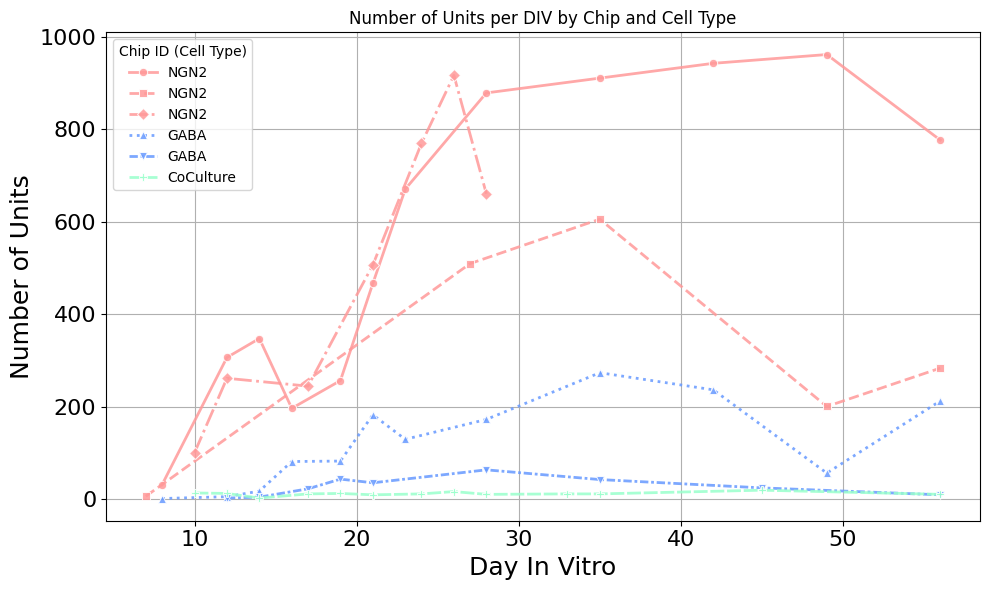

In [42]:
plot_units_per_div(df, chips)

Metrics over time

In [64]:
df = df[df['firing_rate'] < 10]
df = df[df['speed_ms-1'] < 5]
df= df[df['div'] !=45]

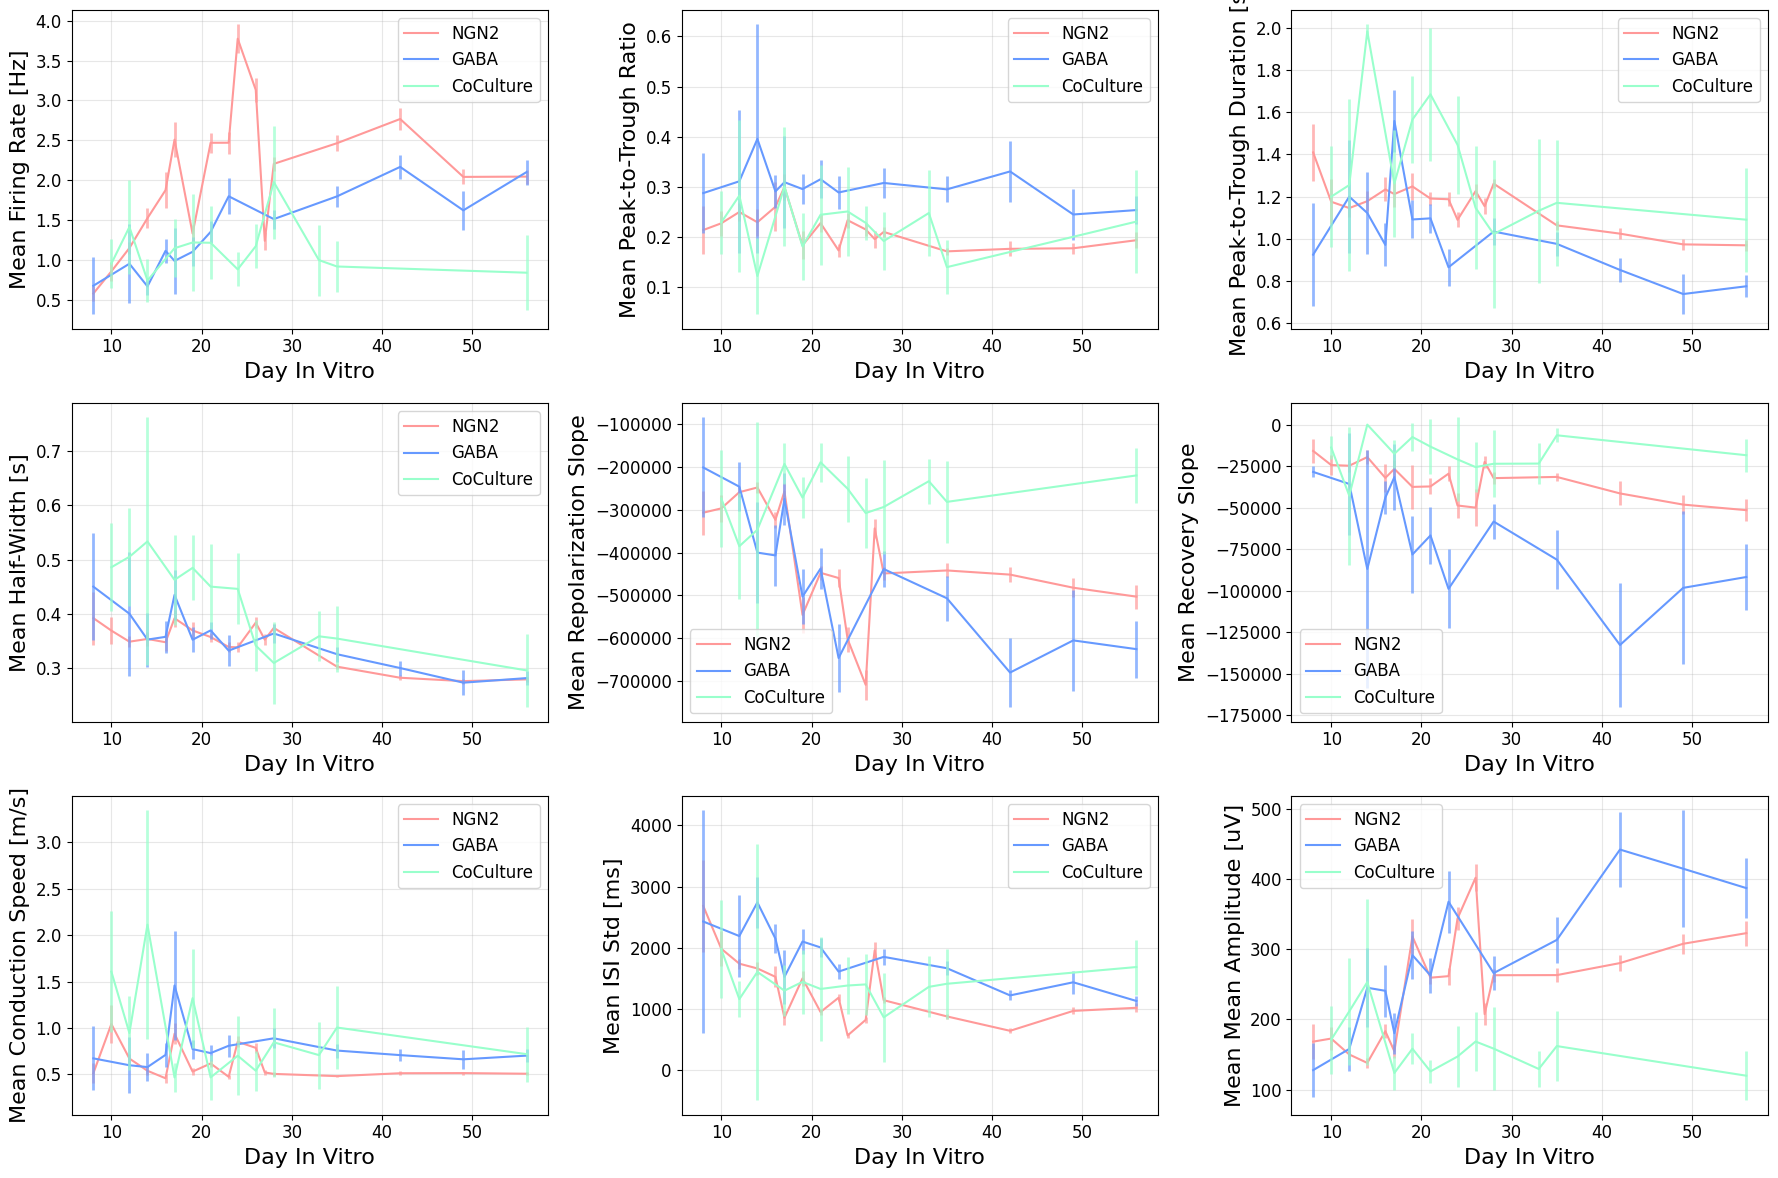

In [67]:
#plot all these distributions over time per each cell_type
def plot_metric_means_over_time(df, chips):
    metrics = [
        'firing_rate', 'peak_trough_ratio', 'peak_to_trough_duration', 'half_width',
        'repolarization_slope', 'recovery_slope', 'speed_ms-1', 'isi_std', 'amplitude uV'
    ]
    metric_titles = {
        'firing_rate': 'Firing Rate [Hz]',
        'peak_trough_ratio': 'Peak-to-Trough Ratio',
        'peak_to_trough_duration': 'Peak-to-Trough Duration [s]',
        'half_width': 'Half-Width [s]',
        'repolarization_slope': 'Repolarization Slope',
        'recovery_slope': 'Recovery Slope',
        'speed_ms-1': 'Conduction Speed [m/s]',
        'isi_std': 'ISI Std [ms]',
        'amplitude uV': 'Mean Amplitude [uV]'
    }
    pastel_colors = {
        'NGN2': '#ff9999',
        'GABA': '#6699ff',
        'CoCulture': '#99ffcc'
    }
    cell_types = ['NGN2', 'GABA', 'CoCulture']

    n_metrics = len(metrics)
    ncols = 3
    nrows = int(np.ceil(n_metrics / ncols))
    fig, axes = plt.subplots(nrows, ncols, figsize=(ncols * 6, nrows * 4), sharex=False)
    axes = axes.flatten()

    for idx, metric in enumerate(metrics):
        ax = axes[idx]
        for cell_type in cell_types:
            sub = df[df['cell_type'] == cell_type]
            sub = sub.copy()
            sub['div'] = sub['div'].astype(int)
            grouped = sub.groupby('div')[metric].agg(['mean', 'count', 'std']).reset_index()
            grouped = grouped[grouped['count'] > 1]
            if not grouped.empty:
                ci = 1.96 * grouped['std'] / np.sqrt(grouped['count'])
                ax.plot(grouped['div'], grouped['mean'], label=cell_type, color=pastel_colors.get(cell_type, '#cccccc'))
                # Draw vertical lines for CI
                ax.vlines(grouped['div'], grouped['mean'] - ci, grouped['mean'] + ci, color=pastel_colors.get(cell_type, '#cccccc'), alpha=0.7, linewidth=2)
        #ax.set_title(metric_titles.get(metric, metric), fontsize=14)
        ax.set_xlabel('Day In Vitro', fontsize=16)
        ax.set_ylabel(f'Mean {metric_titles.get(metric, metric)}', fontsize=16)
        ax.legend()
        ax.grid(True, alpha=0.3)
    # Remove unused axes
    for j in range(idx + 1, len(axes)):
        fig.delaxes(axes[j])
    plt.tight_layout()
    plt.savefig(os.path.join(OUTPUT_PATH, 'metrics_over_time_mean_ci.png'), dpi=300, bbox_inches='tight', format='png')
    plt.savefig(os.path.join(OUTPUT_PATH, 'metrics_over_time_mean_ci.pdf'), dpi=300, bbox_inches='tight', format='pdf')
    plt.show()

plot_metric_means_over_time(df, chips)
